In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
scaler = StandardScaler(with_mean=False)
label = OneHotEncoder(handle_unknown='ignore')

In [37]:
df = pd.read_csv("cleaned_survey.csv")

In [38]:
cat_col = [ 'Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'gender']

num_col = ['Age']

In [39]:
cat_col_trans = Pipeline([('cat',label),('scale',scaler)])
num_col_trans = Pipeline([('_scale_',scaler)])

In [40]:
df_test=df[:375]
df_train = df[375:]

In [41]:
preprocessor = ColumnTransformer([('categorical',cat_col_trans,cat_col),
                                  ('numerical',num_col_trans,num_col)
                ])

In [42]:
k_mean = KMeans(n_clusters=4)

In [43]:
model = Pipeline([('preprocessor',preprocessor),('model',k_mean)])

In [44]:
model.fit(df_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numerical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
y_predict = model.predict(df_train)

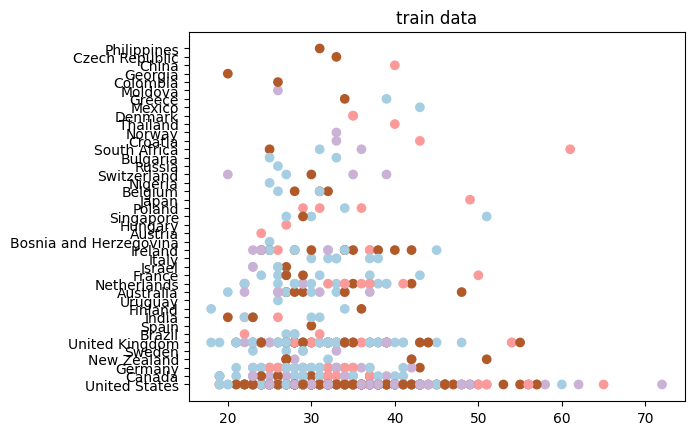

In [47]:
plt.scatter(df_train.iloc[:,0], df_train.iloc[:,1], c=y_predict, cmap=plt.cm.Paired)  
plt.title('train data')  
plt.show() 